In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
#from support_functions import plot_confusion_matrix, generate_features_targets
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [15]:
def calculate_accuracy(predicted, actual):
  return sum(predicted==actual)/len(actual)

In [16]:
def generate_features_targets(data):
  targets = data['class']
  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets

Our accuracy score: 0.791025641025641
[[201  54   5]
 [ 55 183  22]
 [  5  22 233]]


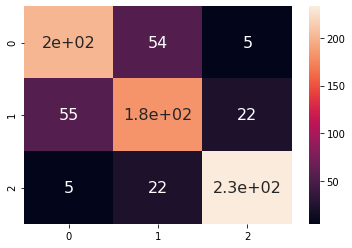

In [17]:
if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # split the data
  features, targets = generate_features_targets(data)

  # train the model to get predicted and actual classes
  dtc = DecisionTreeClassifier()
  predicted = cross_val_predict(dtc, features, targets, cv=10)

  # calculate the model score using your function
  model_score = calculate_accuracy(predicted, targets)
  print("Our accuracy score:", model_score)

  # calculate the models confusion matrix using sklearns confusion_matrix function
  class_labels = list(set(targets))
  model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)
  print(model_cm)  
  #plt.matshow(model_cm)
  sn.heatmap(model_cm,annot=True, annot_kws={"size": 16})
  # Plot the confusion matrix using the provided functions.
  #plt.figure()
  #plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  #plt.show()